<a href="https://colab.research.google.com/github/Hasib1938/Hasib1938/blob/main/QuantumGates_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 2: Quantum Gates
### Qubit notation

Classical bits are always either 0 or 1 at every point during a computation. There is no more detail we can add to the state of a bit than this. So to write down the state of a of classical bit (c), we can just use these two binary values. For example:

$c = 0$

This restriction is lifted for quantum bits. Whether we get a 0 or a 1 from a qubit only needs to be well-defined when a measurement is made to extract an output. At that point, it must commit to one of these two options. At all other times, its state will be something more complex than can be captured by a simple binary value.

This is a lot of notation to take in all at once. First, let's unpack the weird | and $\rangle$. Their job is essentially just to remind us that we are talking about the vectors that represent qubit states labelled  and . This helps us distinguish them from things like the bit values 0 and 1 or the numbers 0 and 1. It is part of the bra-ket notation, introduced by Dirac.

In quantum mechanics, bra-ket notation is a standard notation for describing quantum states. It can also be used to denote abstract vectors and linear functionals in mathematics.

We can have states |0$\rangle$ and |1$\rangle$, and also states in between.

Eg. |$q_0\rangle$ =
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{-i}{\sqrt{2}}
\end{bmatrix}

Since |$0\rangle$ and |$1\rangle$ form an orthonormal basis, we can write
|$q_0\rangle$ = $\frac{1}{\sqrt{2}}|0\rangle - \frac{i}{\sqrt{2}}|1\rangle$

The vector |$q_0\rangle$ is called a *statevector*, and it tells us everything we can know about the qubit. It is not entirely $|0\rangle$ nor $|1\rangle$. Instead, it is a linear combination of both - called a *superposition*.

Qubits are limited in the form: |$q_0\rangle$ = $cos(\frac{\theta}{2})|0\rangle - e^{i\phi}  sin(\frac{\theta}{2})|1\rangle$

An important feature of quantum circuits is that, between initializing the qubits and measuring them, the operations (gates) are always reversible! These reversible gates can be represented as matrices, and as rotations around the Bloch sphere.



In [ ]:
!pip install qiskit[visualization]
!pip install qiskit-aer
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')
sim_state = Aer.get_backend('statevector_simulator')

## Pauli Matrices

###Pauli X Gate

The Pauli X is represented by
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
=
$|0⟩⟨1| + |1⟩⟨0|$

To see the effect of the X gate on a qubit, we simply multiply the matrix by the qubit. We can see that the X gate switches the amplitudes of the $|0⟩$ and $|1⟩$ states

$X|0⟩ =
\left( \begin{array}{cc}
0 & 1 \\
1 & 0
\end{array} \right)
%
\left( \begin{array}{cc}
1 \\
0
\end{array} \right) =
%
\left( \begin{array}{cc}
0 \\
1
\end{array} \right) = |1⟩$

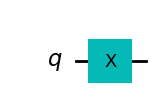

In [ ]:
#Perform an X-gate on |0>
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

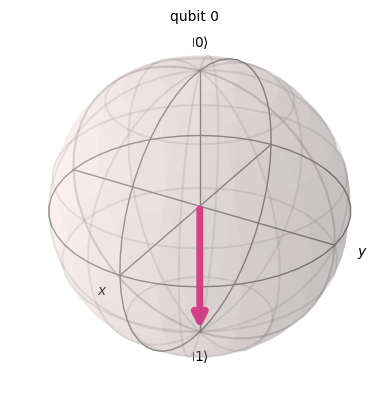

In [ ]:
sv = sim_state.run(qc).result().get_statevector()
plot_bloch_multivector(sv)

We can see that our state does go from $|0⟩$ to $|1⟩$!
We can think of this as a rotation by  radians around the x-axis of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

##Pauli Y and Z Gates
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:

Y = $-i|0⟩⟨1| + i|1⟩⟨0|$
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}

Z = $|0⟩⟨0| - |1⟩⟨1|$
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}


### Digression: Eigenvectors

We have seen that multiplying a vector by a matrix results in a vector:

$M|v⟩ = |v'⟩$

If we chose the right vectors and matrices, we can find a case in which this matrix multiplication is the same as doing a multiplication by a scalar:

$M|v⟩ = λ|v⟩$ where $M$ is a matrix and $λ$ is a scalar

An example of an eigenvector is $|0⟩$ and $|1⟩$ for $Z$

$Z|0⟩ = |0⟩$

$Z|1⟩ = -|1⟩$

Since we use vectors to describe the state of our qubits, we often call these vectors eigenstates in this context. Eigenvectors are very important in quantum computing, and it is important you have a solid grasp of them.

This is not the only basis we can use, a popular basis is the X-basis, formed by the eigenstates of the X-gate. We call these two vectors $|+\rangle$ and $|-\rangle$:

$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $

$|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$


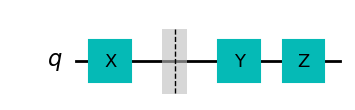

In [ ]:
qc.barrier()
qc.y(0)
qc.z(0)
qc.draw('mpl')

##The Hadamard Gate

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of  and $|0\rangle$ and $|1\rangle$. It has the matrix:

$\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix} $

We can see the below transformations:

$H|0\rangle = |+\rangle$


$H|1\rangle = |-\rangle$

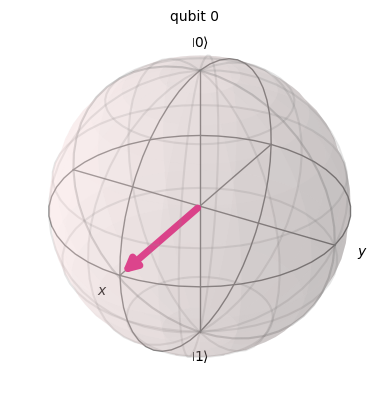

In [ ]:
#Effect of H on |0>
qc = QuantumCircuit(1)
qc.h(0)
plot_bloch_multivector(sim_state.run(qc).result().get_statevector())

##The P-gate
The P-gate (phase gate) is parametrised, that is, it needs a number $\phi$ to tell it exactly what to do. The P-gate performs a rotation of  around the Z-axis direction. It has the matrix form:
$
\begin{bmatrix}
1 & 0 \\
0 & e^{i\phi}
\end{bmatrix} $

Where $\phi$ is a real number.


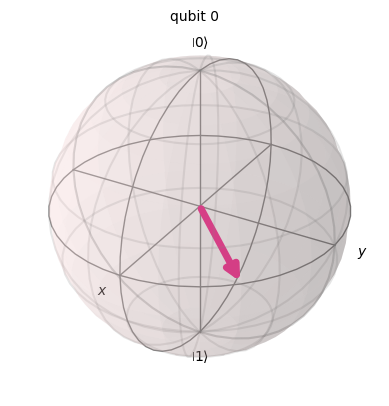

In [ ]:
#Effect on |+>
qc = QuantumCircuit(1)
qc.h(0)
qc.p(pi/4, 0)
plot_bloch_multivector(sim_state.run(qc).result().get_statevector())

You may notice that the Z-gate is a special case of the P-gate, with $\phi = π$.
In fact there are three more commonly referenced gates we will mention in this lab, all of which are special cases of the P-gate.



##Measuring in different bases
We have seen that the Z-axis is not intrinsically special, and that there are infinitely many other bases. Similarly with measurement, we don’t always have to measure in the computational basis (the Z-basis), we can measure our qubits in any basis.

Let's try measuring in the X basis. Since Qiskit only allows measuring in the Z-basis, we need to add a series of gates to measure in our desired basis.

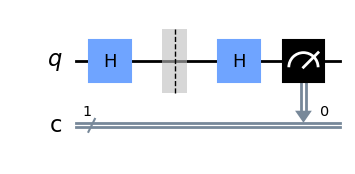

In [ ]:
#Measuring in X basis

qc = QuantumCircuit(1,1)
qc.h(0) #our qubit is now in |+>; when we measure, we should get 100% measurement

#We now measure in +/- basis
qc.barrier()
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

In [ ]:
#Ex 1: Measuring in Y basis
#Hint: use https://javafxpert.github.io/grok-bloch/

qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)



qc.measure(0,0)
sim.run(qc).result().get_counts()

{'0': 497, '1': 527}

#The I, S, T gates

##The I gate
The 'Identity' Gate does nothing! Applying the gate does nothing on the circuit.

It's primarily used in 2 places:

1. To prove a gate is its own inverse: $I = XX$
2. It is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.


##The S gate
The S gate (also called $\sqrt{Z}$ gate) is a P gate with $\phi = \frac{\pi}{2}$

It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this lab so far, the S-gate is not its own inverse! As a result, you will often see the $S^†$, which is a P gate with $\phi = \frac{-\pi}{2}$

The reason it's also called a  $\sqrt{Z}$ gate is because two successive S gates is equal to a Z gate:

$SS|\psi\rangle = Z|\psi\rangle$

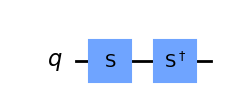

In [ ]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S gate to qubit 0
qc.sdg(0) # Apply Sdg gate to qubit 0
qc.draw('mpl')

##The T gate

The T gate is also commonly used, which is a P gate with $\phi = \frac{\pi}{4}$.
It's also known as a $\sqrt[4]{Z}-$ gate

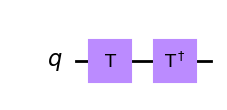

In [ ]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T gate to qubit 0
qc.tdg(0) # Apply Tdg gate to qubit 0
qc.draw('mpl')